In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import pickle
import cv2
import tensorflow as tf
from tensorflow.python import keras
from proj2_helpers import *
from ImageProcessing import *
from PIL import Image
from scipy import ndimage, signal

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'helpers'

# 1. Loading  Data

1.1 Loading Train Data

In [3]:
filename_X = "X_1D_patch16_channels14"
filename_Y = "Y_1D_patch16_channels14"

infile_X = open(filename_X + ".pickle","rb")
X = pickle.load(infile_X)
infile_X.close()

infile_Y = open(filename_Y + ".pickle","rb")
Y = pickle.load(infile_Y)
infile_Y.close()

print("Loaded " + filename_X + " and " + filename_Y)
print("X shape is", X.shape)
print("Y shape is", Y.shape)

Loaded X_1D_patch16_channels14 and Y_1D_patch16_channels14
X shape is (500000, 14)
Y shape is (500000,)


1.2 Load Model

In [4]:
modelname = "Model_1D_patch16_channels14"

model = keras.models.load_model(modelname + ".h5")

# 2. Training Neural Net

2.2 Normalization of data

In [4]:
x_train = X
y_train = keras.utils.to_categorical(Y,num_classes=2)

print("x_train shape:",x_train.shape)
print("y_train shape:", y_train.shape)
del X, Y

x_train shape: (500000, 14)
y_train shape: (500000, 2)


2.3 Initialization of 1D neural network without convolution

In [5]:
model = keras.Sequential()

model.add(keras.layers.Dense(100,activation='relu',input_shape=x_train.shape[1:]))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 21,902
Trainable params: 21,902
Non-trainable params: 0
_________________________________________________________________


2.4 Initialization of optimization method, loss function and metric

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

2.5 Training

In [11]:
model.fit(x_train,y_train,validation_split=0.2, epochs=10,verbose = 2)

Train on 400000 samples, validate on 100000 samples
Epoch 1/10
400000/400000 - 27s - loss: 0.4020 - accuracy: 0.8070 - val_loss: 0.4008 - val_accuracy: 0.8083
Epoch 2/10
400000/400000 - 31s - loss: 0.3992 - accuracy: 0.8086 - val_loss: 0.4027 - val_accuracy: 0.8076
Epoch 3/10
400000/400000 - 33s - loss: 0.3976 - accuracy: 0.8090 - val_loss: 0.3957 - val_accuracy: 0.8088
Epoch 4/10
400000/400000 - 28s - loss: 0.3952 - accuracy: 0.8109 - val_loss: 0.4005 - val_accuracy: 0.8061
Epoch 5/10
400000/400000 - 29s - loss: 0.3937 - accuracy: 0.8111 - val_loss: 0.3905 - val_accuracy: 0.8132
Epoch 6/10
400000/400000 - 27s - loss: 0.3916 - accuracy: 0.8126 - val_loss: 0.3983 - val_accuracy: 0.8094
Epoch 7/10
400000/400000 - 26s - loss: 0.3897 - accuracy: 0.8129 - val_loss: 0.3938 - val_accuracy: 0.8108
Epoch 8/10
400000/400000 - 28s - loss: 0.3877 - accuracy: 0.8138 - val_loss: 0.3852 - val_accuracy: 0.8163
Epoch 9/10
400000/400000 - 29s - loss: 0.3859 - accuracy: 0.8154 - val_loss: 0.3821 - val_ac

2.6 Test True Positive Rate

In [12]:
print(TruePositiveRate(x_train, y_train, model))

0.189738


2.7 Delete training variables when ready to switch to testing

In [13]:
del x_train, y_train

# 3. Submission

In [14]:
from SubmissionHelper import *
from datetime import datetime

In [24]:
prediction_filenames=[]
patch_size = 16
for i in range(X_test.shape[0]):
    Yi_pred = np.argmax(model.predict(X_test[i,:,:]),axis=1)
    predicted_mask = label_to_img(608,608,16,16,Yi_pred)
    if i+1<10:
        image_string = "00"+str(i+1)
    else:
        image_string = "0"+str(i+1)
    prediction_filenames += ["Submission/image_"+image_string+".png"]    
    # Saving the masks in the preddir folder
    Image.fromarray(binary_to_uint8(predicted_mask)).save(prediction_filenames[i])  

# Create unique filename
now = datetime.now()
dt_string = now.strftime("%H_%M__%d_%m")
submission_filename = "Submission/" + "submission_" + dt_string + ".csv"
    
# Create submission
masks_to_submission(submission_filename, prediction_filenames)

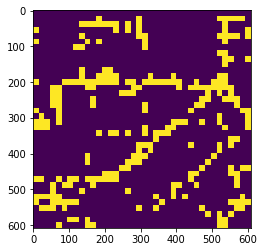

In [25]:
Yi_pred = np.argmax(model.predict(X_test[3,:,:]),axis=1)
predicted_mask = label_to_img(608,608,16,16,Yi_pred)

plt.imshow(binary_to_uint8(predicted_mask))


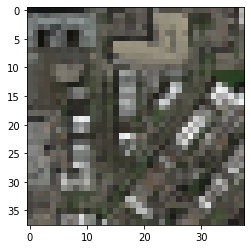

In [26]:
plt.imshow(np.reshape(X_test,(50,38,38,14))[3,:,:,:3])